# Project Name : Bike Renting

Problem Statement : The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings. 

# Importing Standard Libraries

In [1]:
# importing libraries for data pre-processing steps
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
%matplotlib inline

# importing libraries for model development, Performance, Evaluation and Optimization
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Setting up the working directory
os.chdir("E:\DataScienceEdwisor\PythonScripts")

#Checking the current working directory
os.getcwd()

'E:\\DataScienceEdwisor\\PythonScripts'

In [3]:
# Loading the dataset which is in '.CSV' format i.e; (Comma-Seperated-Values)
Bike_Actual = pd.read_csv('day.csv')

data = Bike_Actual.copy()

#  Exploratory Data Analysis  

In [4]:
# Lets see few observations of the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Lets Rename Column names with proper names
data = data.rename(columns = {'dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather',
                                        'hr':'hour','hum':'humidity','cnt':'count'})

In [6]:
# Lets see the dimensions of the dataset
print(data.shape)

(731, 16)


In [7]:
# Information about the data and its data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
datetime      731 non-null object
season        731 non-null int64
year          731 non-null int64
month         731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weather       731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
humidity      731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
count         731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Lets see the descriptive statistics of the data
data.describe()

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Lets Check the COlumn Names
data.columns

Index(['instant', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [10]:
# Lets seperate numeric and categorical columns
num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']
cat_cols = ['season','year','month','holiday','weekday','workingday','weather']

In [11]:
# Lets check the counts in each categorical columns
for i in cat_cols:
    print(i)
    print(data[i].value_counts())
    print("*****************************")

season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
*****************************
year
1    366
0    365
Name: year, dtype: int64
*****************************
month
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: month, dtype: int64
*****************************
holiday
0    710
1     21
Name: holiday, dtype: int64
*****************************
weekday
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
*****************************
workingday
1    500
0    231
Name: workingday, dtype: int64
*****************************
weather
1    463
2    247
3     21
Name: weather, dtype: int64
*****************************


In [12]:
# Lets Check unique values in the whole data
for i in data.columns:
    print(i,' ======================>', len(data[i].value_counts()))

instant  ======================> 731
datetime  ======================> 731
season  ======================> 4
year  ======================> 2
month  ======================> 12
holiday  ======================> 2
weekday  ======================> 7
workingday  ======================> 2
weather  ======================> 3
temp  ======================> 499
atemp  ======================> 690
humidity  ======================> 595
windspeed  ======================> 650
casual  ======================> 606
registered  ======================> 679
count  ======================> 696


<b> Missing value analysis <b>

In [13]:
# Lets if there are any missing values
data.isnull().sum()

instant       0
datetime      0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<b> No missing values are there in the dataset <b> 

<b> Data Visualization  <b>
    
<b> W.K.T target variable 'count' = 'casual' + 'registered' <b>

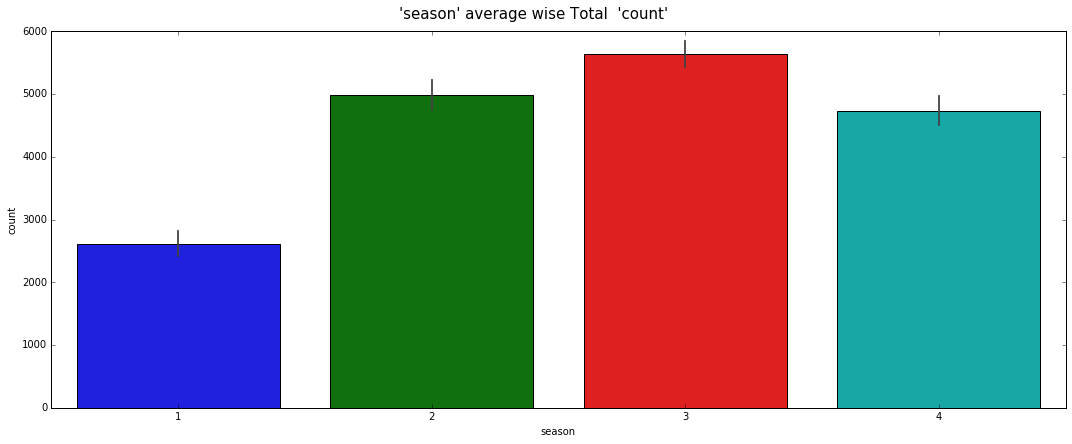

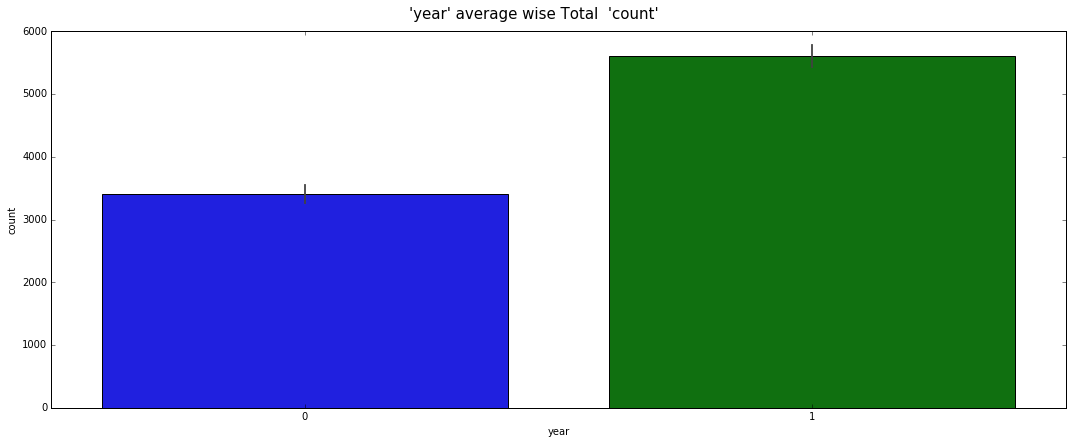

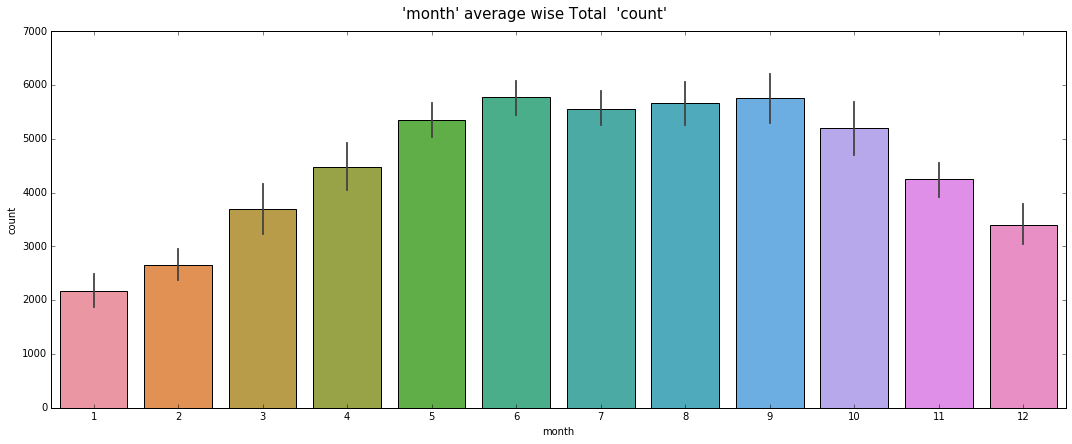

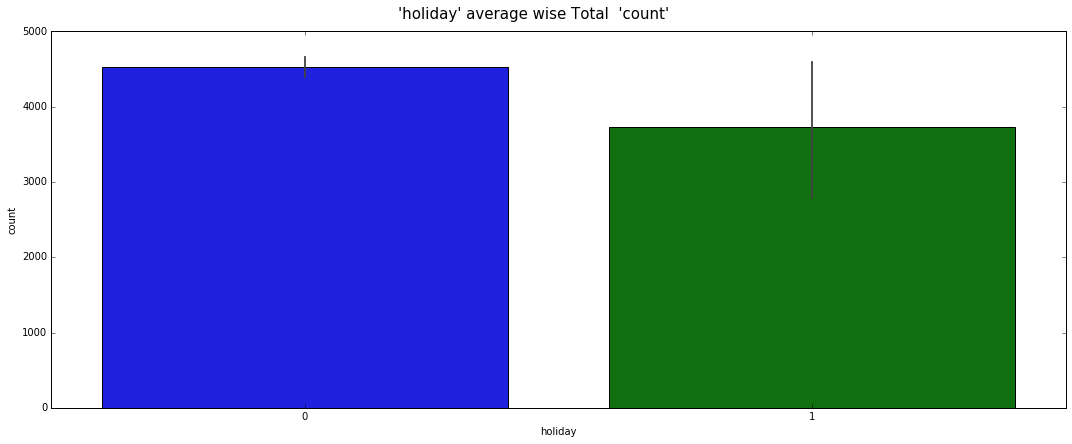

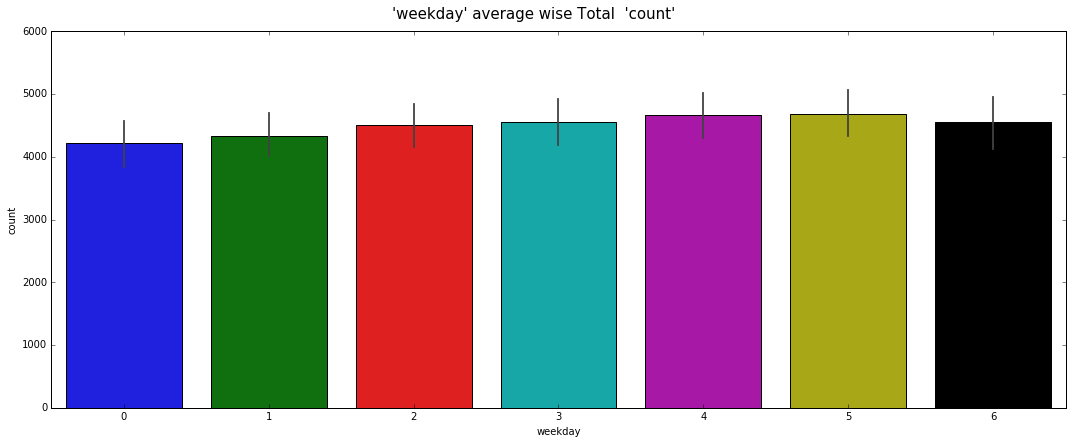

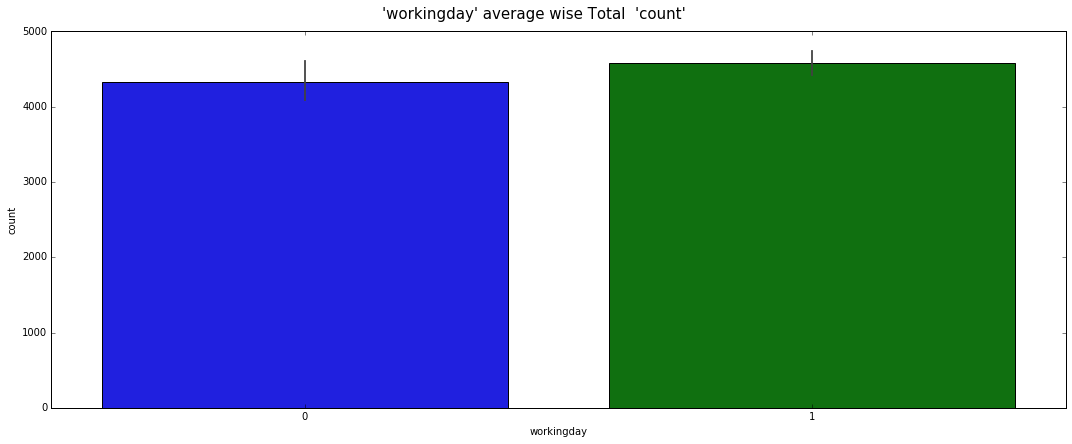

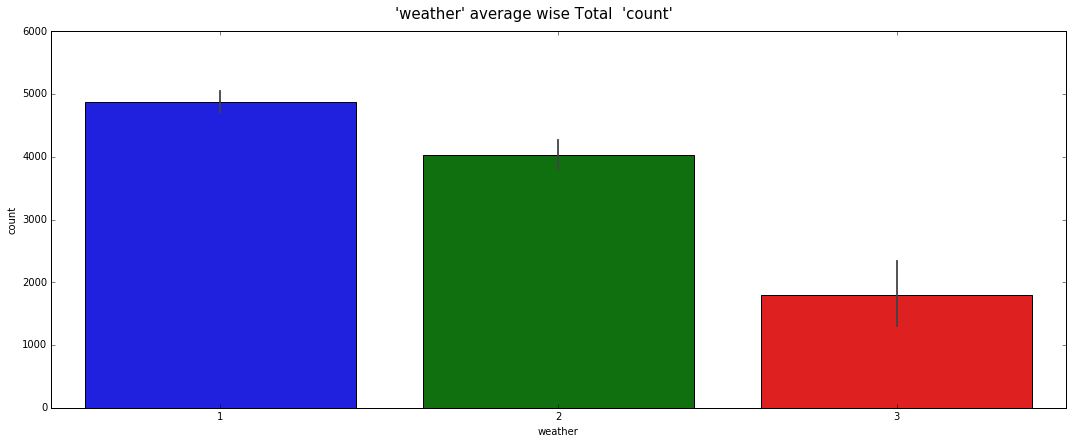

In [14]:
# Average Count of all Bikes Distribution 
for i in cat_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.barplot(x=i, y="count", data=data)
    fig.set(xlabel=i, ylabel='count')
    plt.suptitle("'{X}' average wise Total  '{Y}' ".format(X=i,Y='count'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

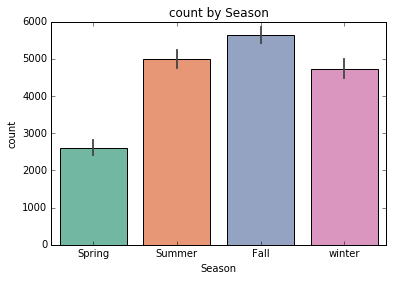

In [15]:
# Count of seasons with labels 1:spring, 2-summer, 3-fall, 4-winter
fig, ax = plt.subplots()
sns.barplot(data=data[['season','count']],
            x='season',
            y='count',
            ax=ax, palette = 'Set2')

plt.title('count by Season')
plt.ylabel('count')
plt.xlabel('Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Spring','Summer','Fall',"winter"]
plt.xticks(tick_val, tick_lab)

plt.show()


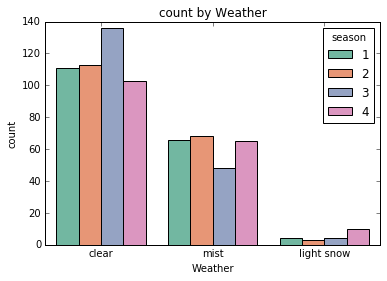

In [16]:
# Count of particular seasons with labels 1: clear, 2: mist, 3: light snow
fig, ax = plt.subplots()
sns.countplot(x= 'weather', hue = 'season' , data=data, palette = 'Set2')

plt.title('count by Weather')
plt.ylabel('count')
plt.xlabel('Weather')

tick_val=[0, 1, 2]
tick_lab=['clear','mist','light snow']
plt.xticks(tick_val, tick_lab)

plt.show()

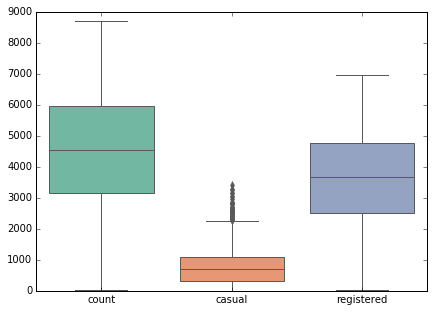

In [17]:
# Lets check the count of the target variable cnt and registered and casual
fig = plt.subplots(figsize=(7,5))
sns.boxplot(data=data[['count', 'casual', 'registered']], palette='Set2')

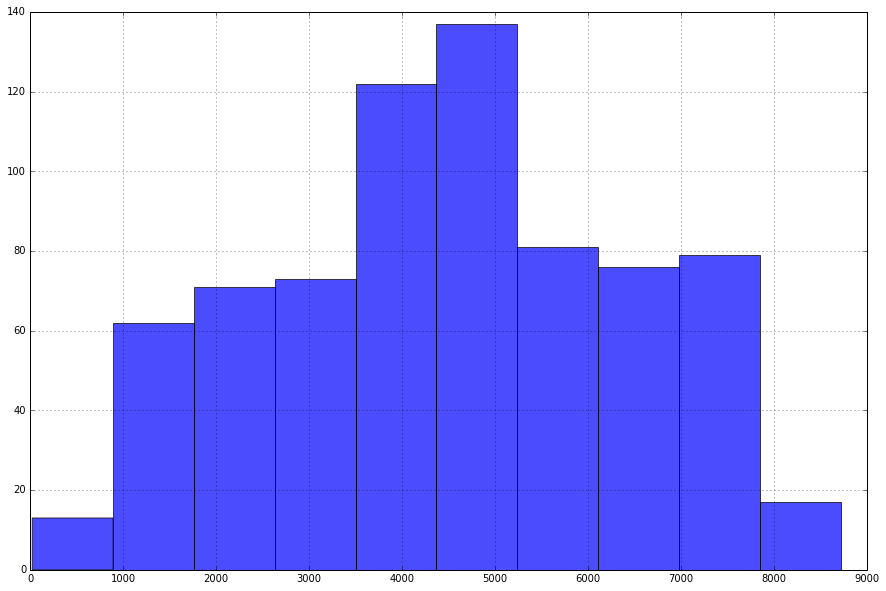

In [18]:
# Lets see the distribution of the target variable cnt
data['count'].hist(figsize=(15,10), color='Blue', alpha=0.7)

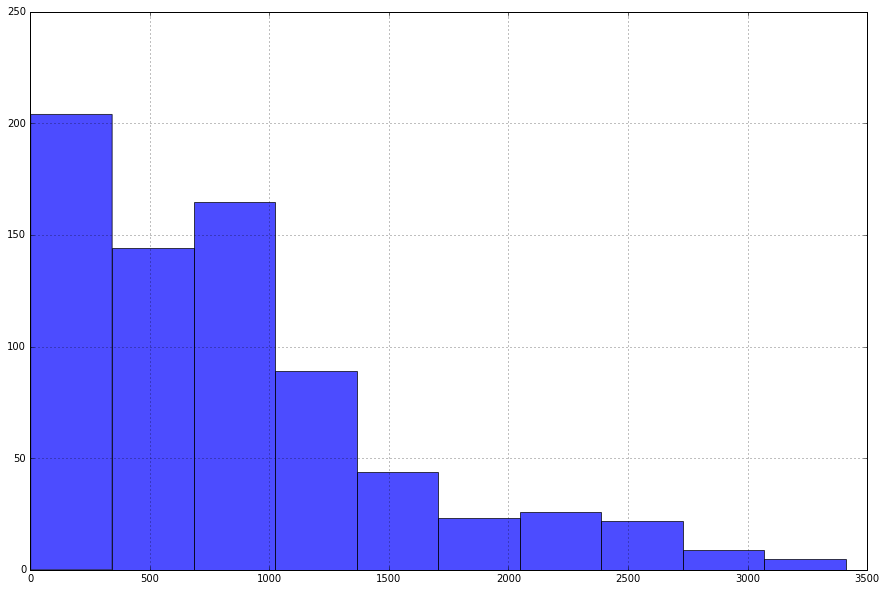

In [19]:
# Lets see the distribution of the target variable casual
data['casual'].hist(figsize=(15,10), color='Blue', alpha=0.7)

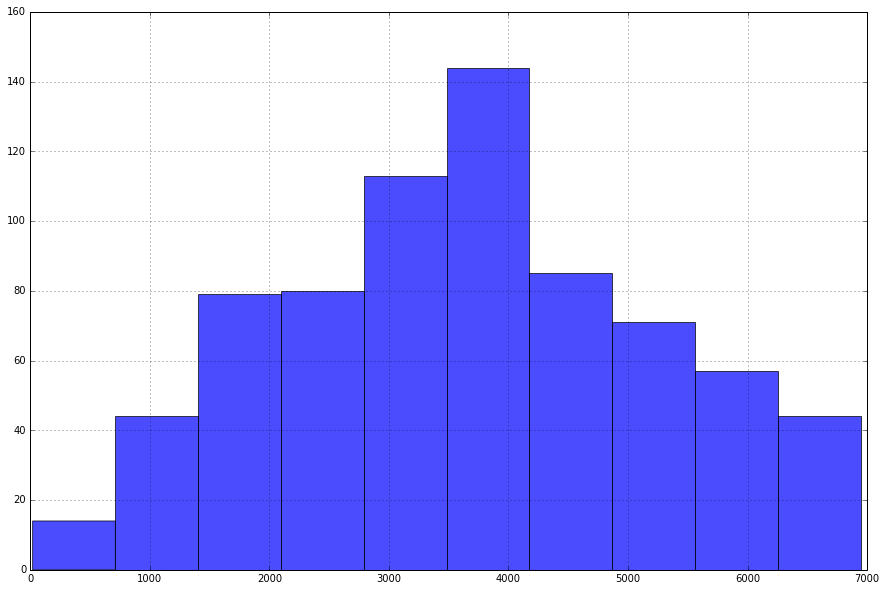

In [20]:
# Lets see the distribution of the target variable registered
data['registered'].hist(figsize=(15,10), color='Blue', alpha=0.7)

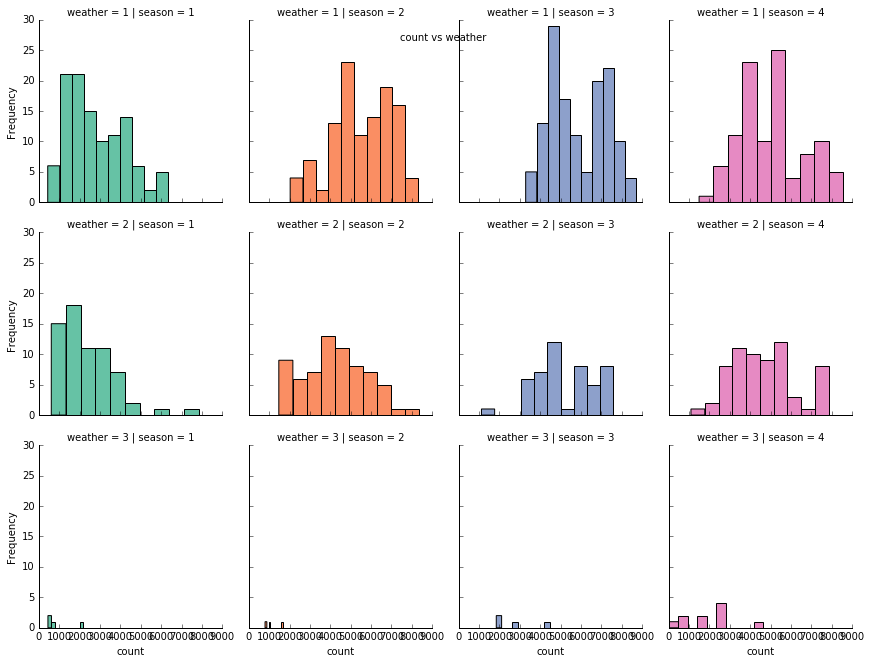

In [21]:
# Distribution of weather in all four different seasons
plot= sns.FacetGrid(data=data,
               col='season',
               row='weather',hue='season', palette='Set2')
plot.map(plt.hist,'count')

plt.subplots_adjust(top=1.0)
plot.fig.suptitle('count vs weather')

plot.set_xlabels('count')
plot.set_ylabels('Frequency')

plt.show()

<b> Scatter Plot Analysis to See Relationship between Features for Numeric Columns VS Count Variable  <b>

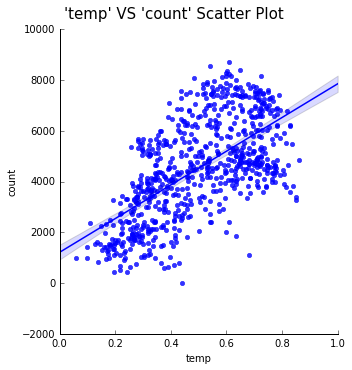

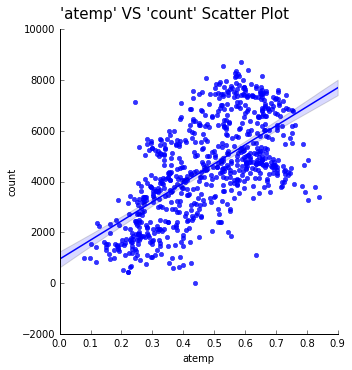

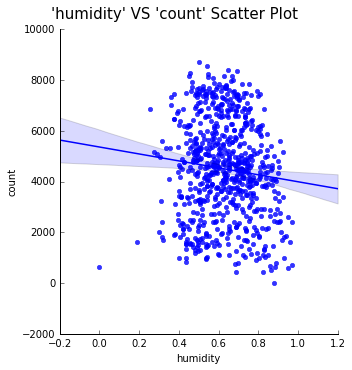

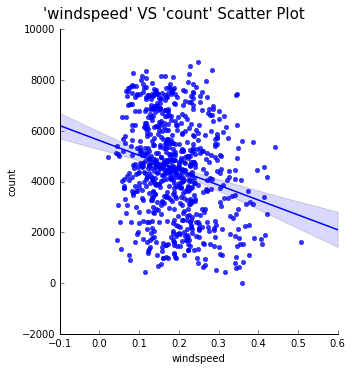

In [22]:
# Scatter Plot For Cheking the Variables Scatter VS Count
for i in ['temp','atemp','humidity','windspeed']:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="count", data=data)
    fig.set(xlabel=i, ylabel='count')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot ".format(X=i,Y='count'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<b> Scatter Plot Analysis to See Relationship between Features for Numeric Columns VS Casual Variable  <b>

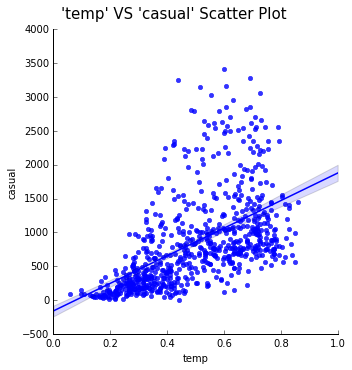

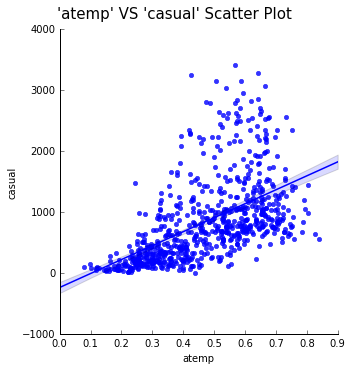

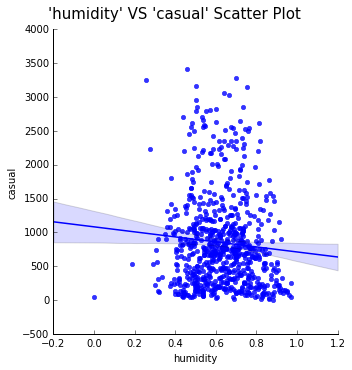

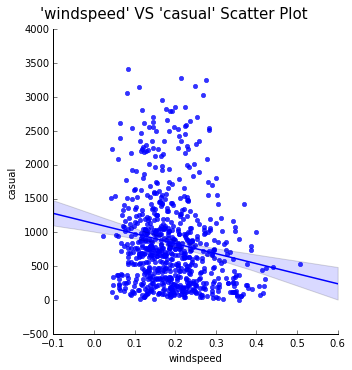

In [23]:
# Scatter Plot For Cheking the Variables Scatter VS Casual
for i in ['temp','atemp','humidity','windspeed']:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="casual", data=data)
    fig.set(xlabel=i, ylabel='casual')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot ".format(X=i,Y='casual'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<b> Scatter Plot Analysis to See Relationship between Features for Numeric Columns VS Registered Variable  <b>

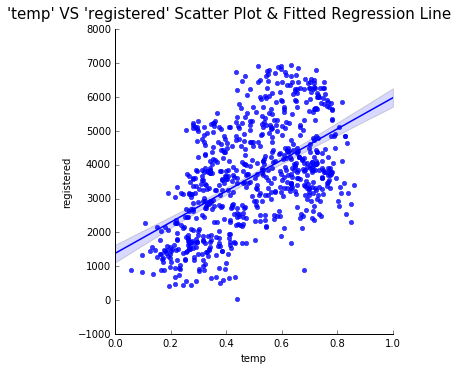

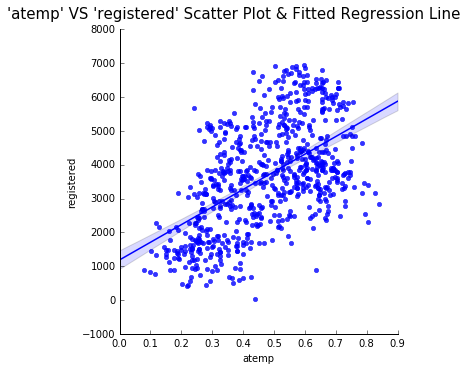

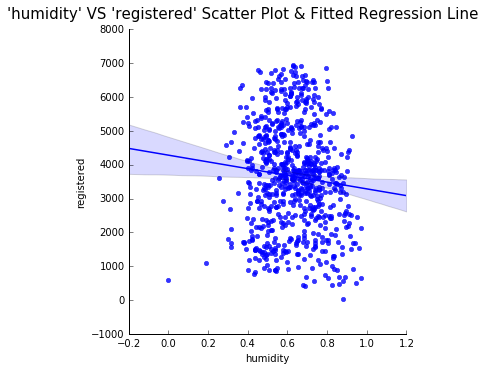

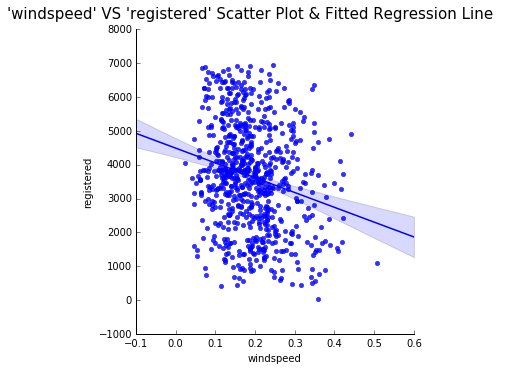

In [24]:
# Scatter Plot For Cheking the Variables Scatter VS Registered
for i in ['temp','atemp','humidity','windspeed']:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="registered", data=data)
    fig.set(xlabel=i, ylabel='registered')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot & Fitted Regression Line ".format(X=i,Y='registered'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<b> Scatter Plot Analysis to See Relationship between Features for Categorical Columns <b>

<b> All Categorical Features With respect to target variable Count <b> 

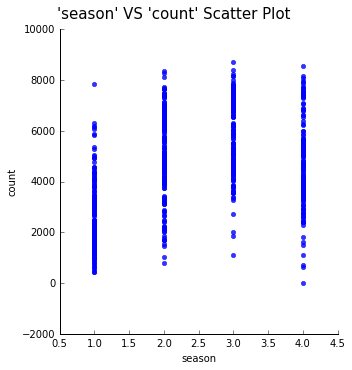

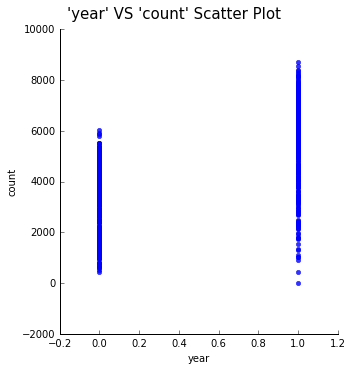

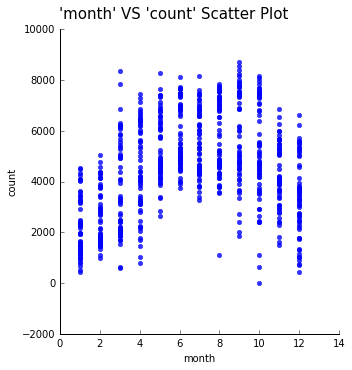

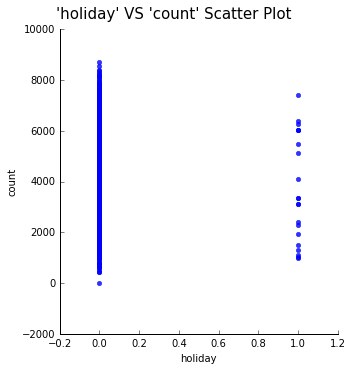

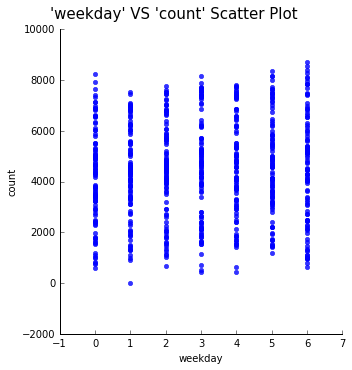

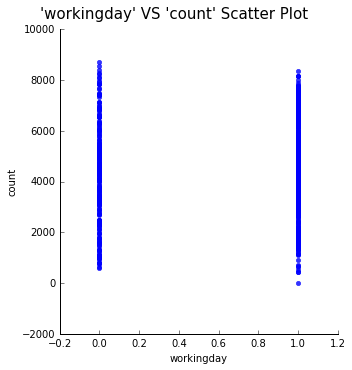

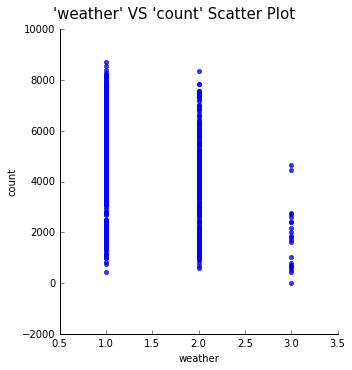

In [25]:
# Scatter Plot For Cheking the Variables Scatter VS Count
for i in cat_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="count", data=data,fit_reg=False)
    fig.set(xlabel=i, ylabel='count')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot ".format(X=i,Y='count'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<b> All Categorical Features With respect to variable Casual <b> 

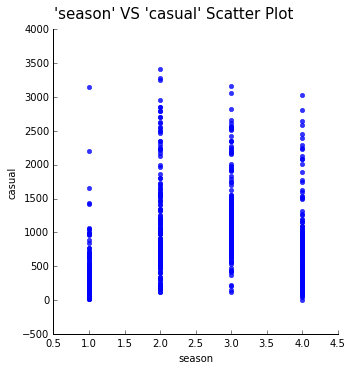

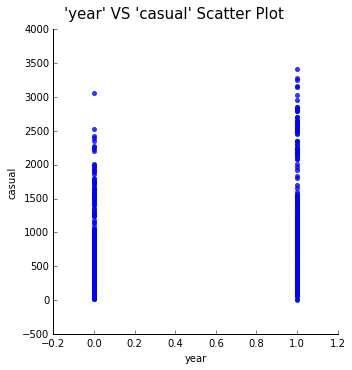

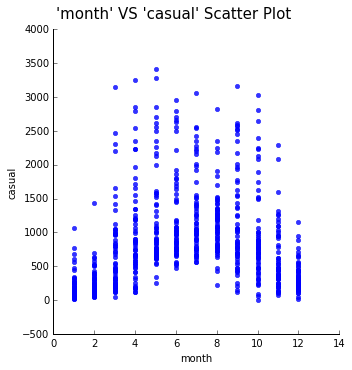

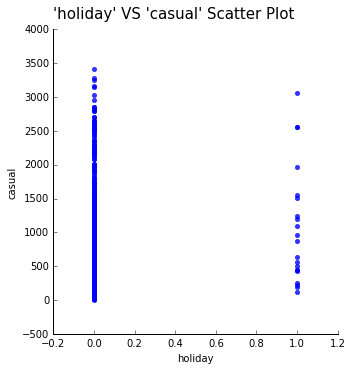

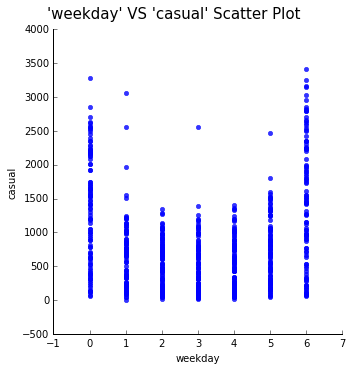

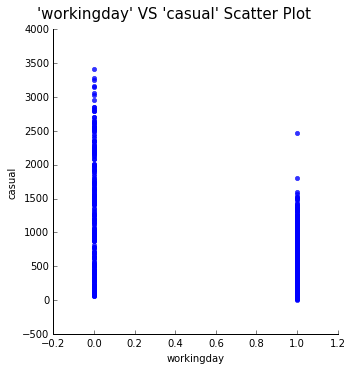

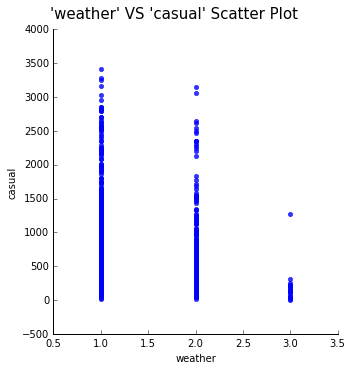

In [26]:
# Scatter Plot For Cheking the Variables Scatter VS Casual
for i in cat_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="casual", data=data,fit_reg=False)
    fig.set(xlabel=i, ylabel='casual')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot ".format(X=i,Y='casual'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

<b> All Categorical Features With respect to variable Registered <b> 

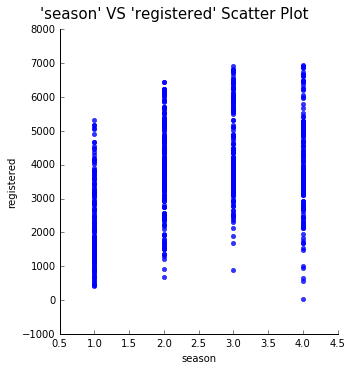

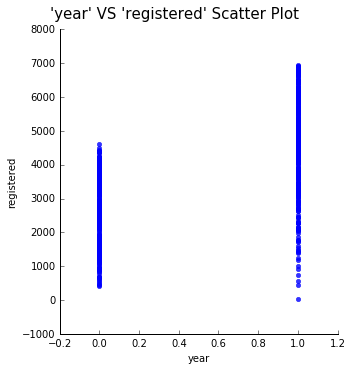

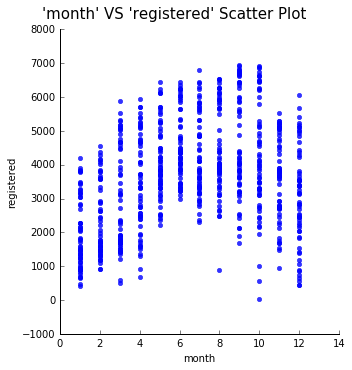

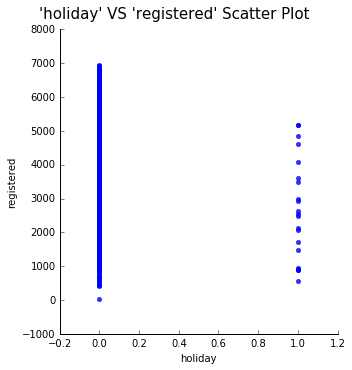

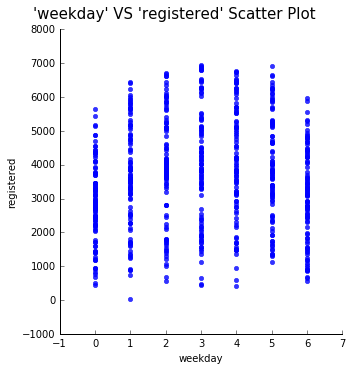

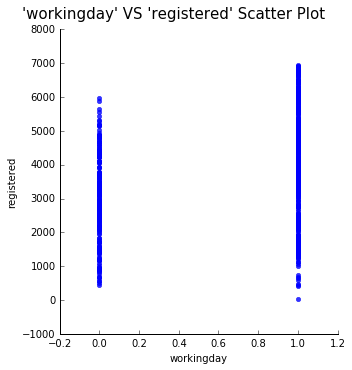

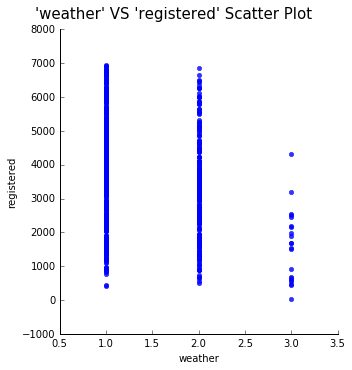

In [27]:
# Scatter Plot For Cheking the Variables Scatter VS Registered
for i in cat_cols:
    fig = plt.figure(figsize=(15,6))
    fig = sns.lmplot(x=i, y="registered", data=data,fit_reg=False)
    fig.set(xlabel=i, ylabel='registered')
    plt.suptitle("'{X}' VS '{Y}' Scatter Plot ".format(X=i,Y='registered'),y = 1.02,fontsize=15)
    plt.tight_layout()
    plt.show()

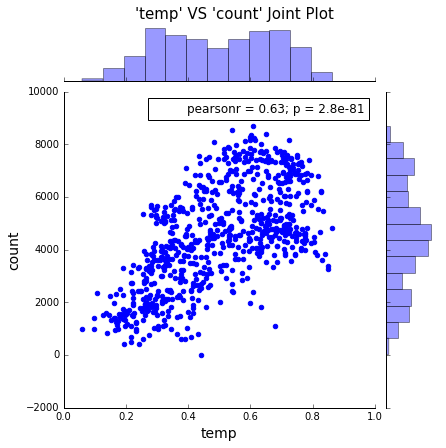

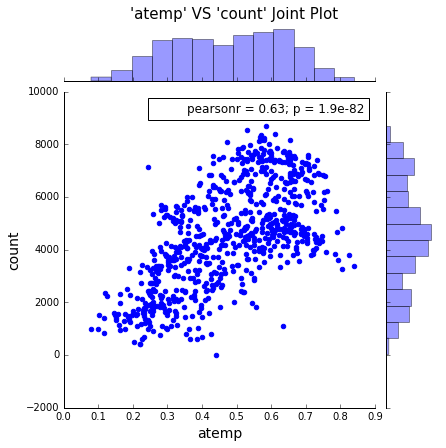

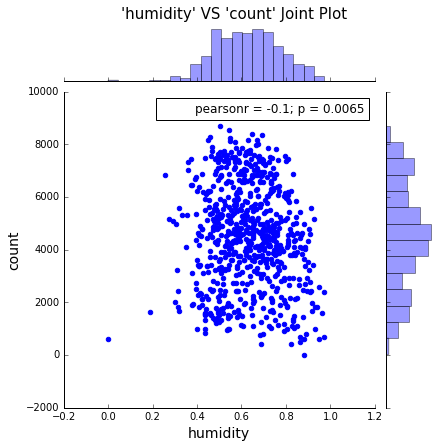

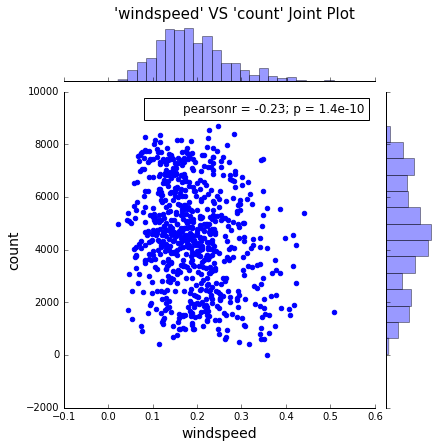

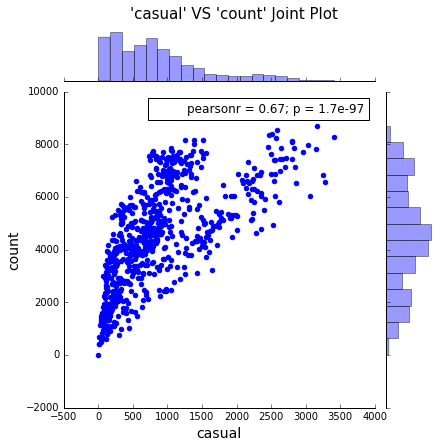

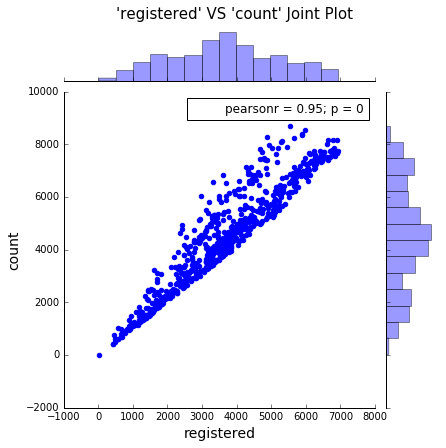

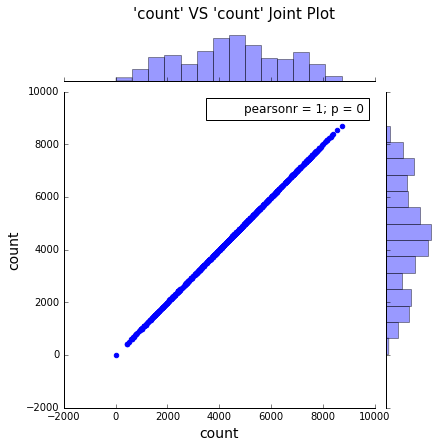

In [28]:
#Joint plot For all numeric column
for i in num_cols:
    fig = plt.figure(figsize=(10,7))
    fig = sns.jointplot(x=i, y="count", data=data)
    fig.set_axis_labels(xlabel=i,ylabel='count',fontsize=14)
    plt.suptitle("'{X}' VS '{Y}' Joint Plot".format(X=i,Y='count'),y = 1.02,fontsize=15)
    plt.show()

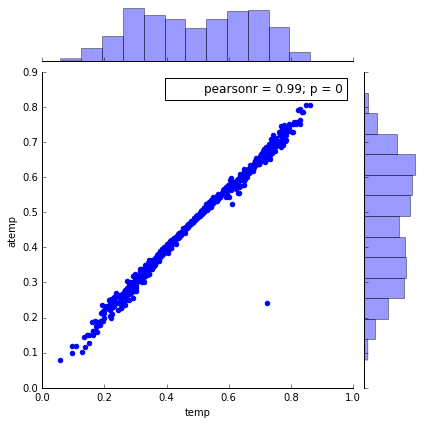

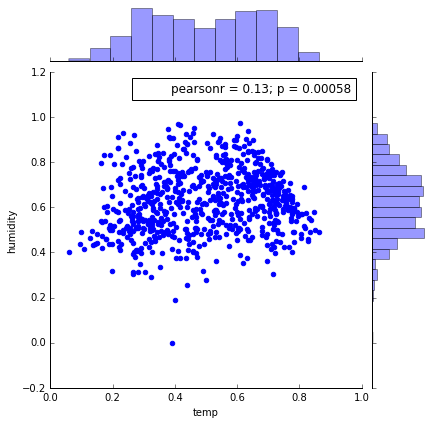

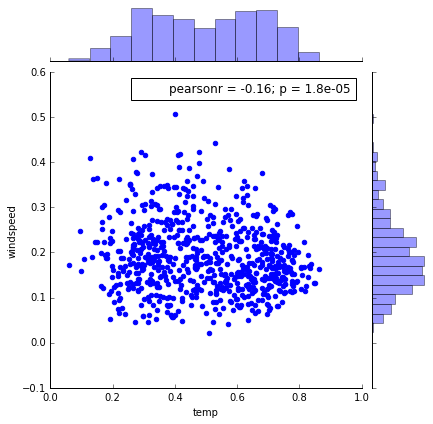

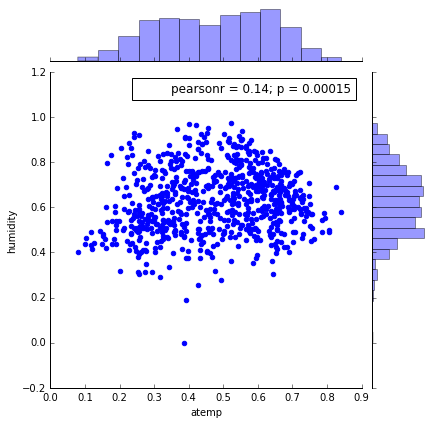

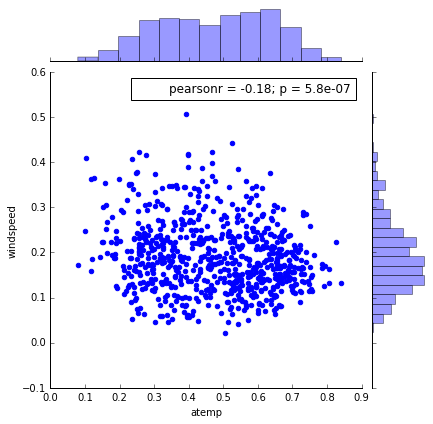

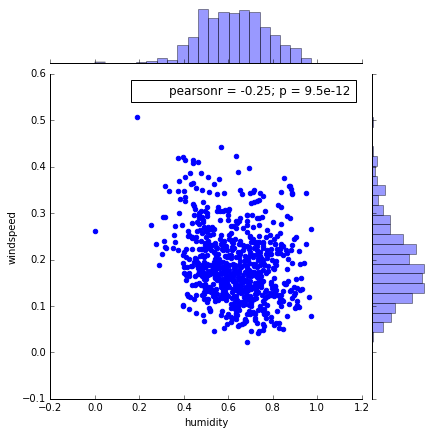

In [29]:
# Jointplots For temp, atemp VS humidity and winsped
plot = sns.jointplot(x = 'temp' , y = 'atemp', data=data)
plot = sns.jointplot(x = 'temp' , y = 'humidity', data=data)
plot = sns.jointplot(x = 'temp' , y = 'windspeed', data=data)
plot = sns.jointplot(x = 'atemp' , y = 'humidity', data=data)
plot = sns.jointplot(x = 'atemp' , y = 'windspeed', data=data)
plot = sns.jointplot(x = 'humidity' , y = 'windspeed', data=data)
plt.subplots_adjust(top=1.0)
plt.show()

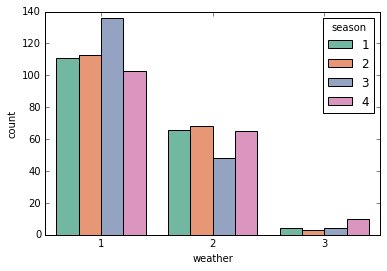

In [30]:
# Lets see the Distribution in weather season wise 
fig = plt.figure()
fig = sns.countplot(x='weather', hue = 'season', data=data, palette='Set2' )

<b> Outlier Analysis using Boxplot method <b>

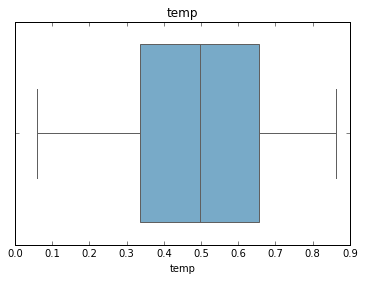

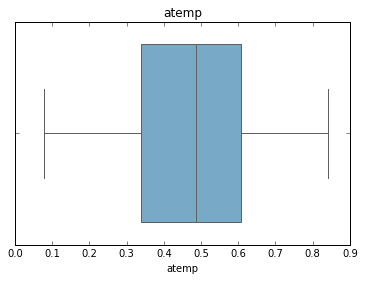

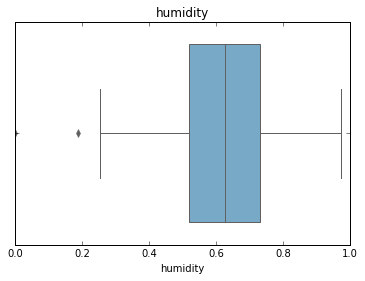

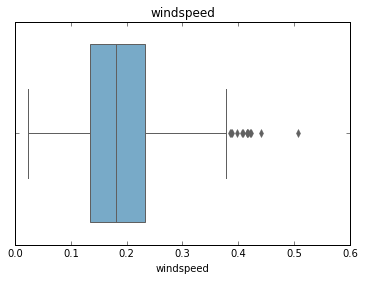

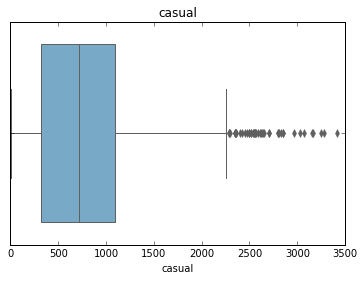

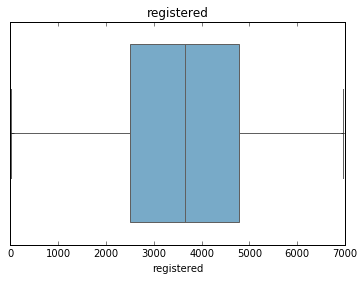

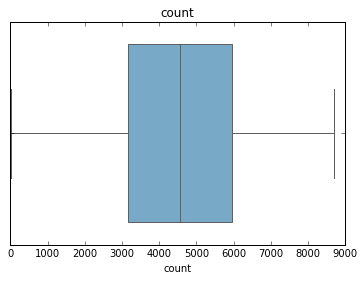

In [31]:
# Lets Check Outlier in Numeric Columns
for i in num_cols:
    plt.figure()
    sns.boxplot(data[i],palette="Blues")
    plt.title(i)
    plt.show()

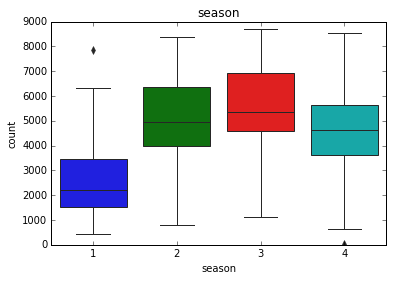

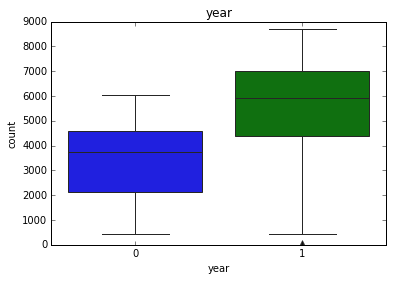

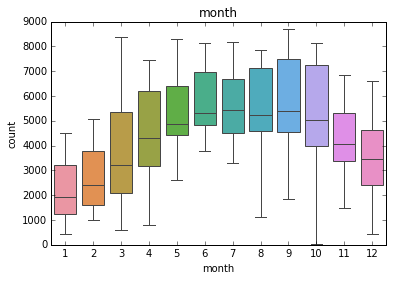

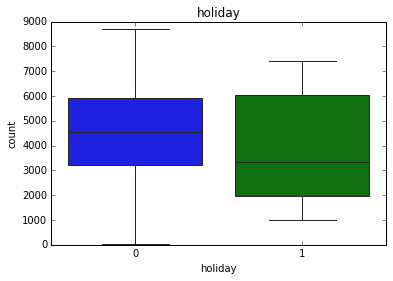

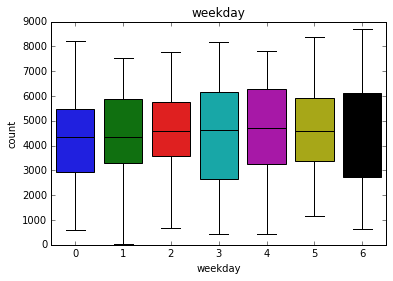

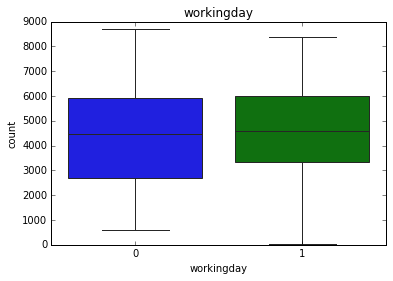

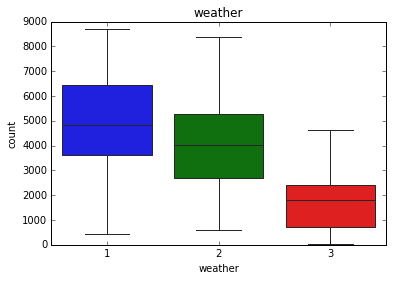

In [32]:
# Lets Check Outlier in Categorical Columns
for i in cat_cols:
    plt.figure()
    sns.boxplot(x=i, y='count', data=data)
    plt.title(i)
    plt.show()

<b> As we can see most of the outliers are in continous / numeric variables itself Lets Detect and Remove Them <b>

In [33]:
# Here we are not considering casual registered and count features 
# Detecting and revoing outliers and then replacing the values with nan
for i in ['temp','atemp','humidity','windspeed']:
    print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75, 25])
    # iqr-Inter Quartile Range
    iqr = q75 - q25
    min = q25 - (iqr * 1.5)
    max = q75 + (iqr * 1.5)
    # Replace the values with np.nan    
    data.loc[data.loc[:,i] < min,i] = np.nan
    data.loc[data.loc[:,i] > max,i] = np.nan
    #Calculate missing value
    print('{numeric}==========>: {x} Missing_Values'.format(numeric = i, x = (data.loc[:,i].isnull().sum())))

temp
temp==========>: 0 Missing_Values
atemp
atemp==========>: 0 Missing_Values
humidity
humidity==========>: 2 Missing_Values
windspeed
windspeed==========>: 13 Missing_Values


In [34]:
# Lets Use fillna method to impute values into the missing values using the mean method
data.humidity = data.humidity.fillna(data.humidity.mean())
data.windspeed = data.windspeed.fillna(data.windspeed.mean())

<b> Fetaure Selection <b>

<b> Correlation Analysis <b>

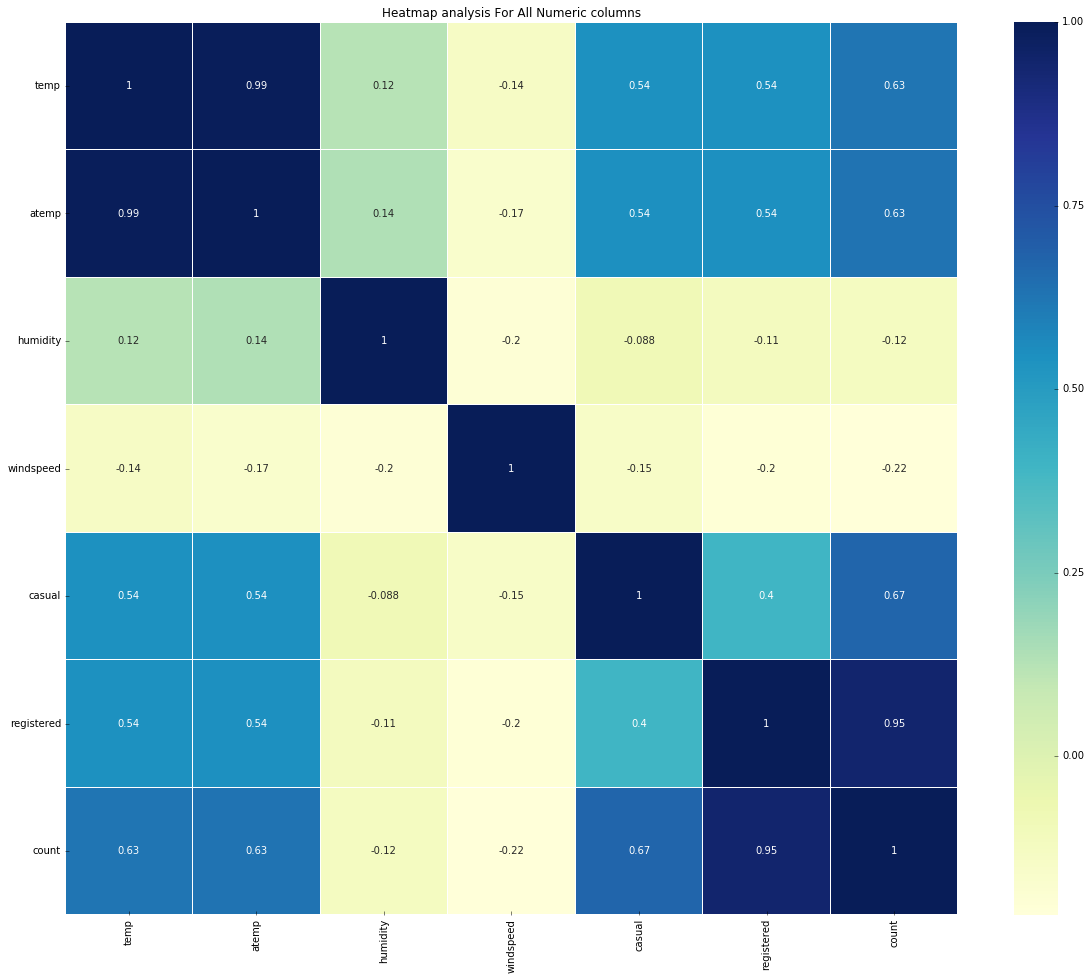

In [35]:
# Generate the Correlation matrix 
corr = data[['temp','atemp','humidity','windspeed','casual', 'registered','count']].corr()

# Ploting using seaborn library
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.title("Heatmap analysis For All Numeric columns")
plt.show()

<b> As we can see that 'temp' & 'atemp' features are hihgly positively correlated with each other and 'registered' & 'casual' are also highly correlated with each other and we can also see there is multicollinearity between 'registred' & 'count' also <b>

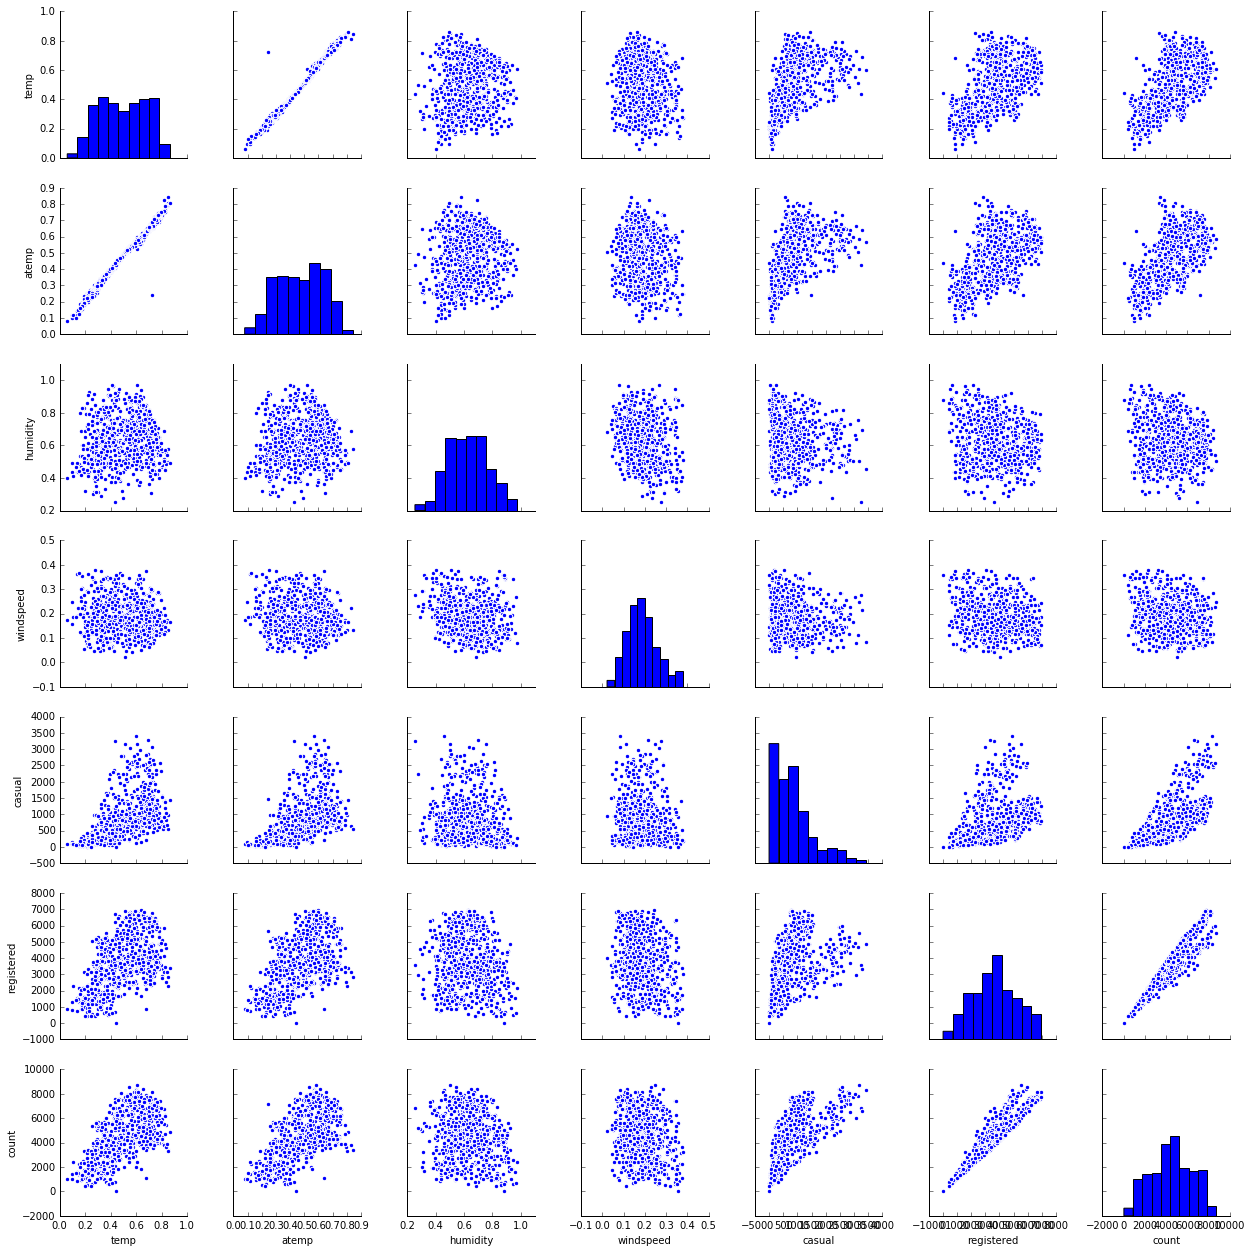

In [36]:
# Lets analyze through pair plot on numeric columns
sns.pairplot(data[['temp','atemp','humidity','windspeed','casual', 'registered','count']],palette ="husl")
plt.tight_layout()
plt.show()

<b> Lets Analyze Chi2-Square Test of Independence for Categorical Variables <b>

In [37]:
# Null Hypothesis H0 = Variables are Not Independent
# ALternate Hypothesis H1 = Variables are Independent

cat_cols = ['season','year','month','holiday','weekday','workingday','weather']
# Creating all combinational pairs because we have different levels in all categorical columns
chi_pairs = [(i,j) for i in cat_cols for j in cat_cols ]

# Extracting all combinations for chi2-test
p_vals = []
for i in chi_pairs:
    if i[0] != i[1]:  
    # here Chi2-Square test compares two variables in contigency table
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(data[i[0]], data[i[1]]))
    
    # Lets round the decimal upto 3
        p_vals.append(p.round(3))
    else:
        p_vals.append('*')

p_vals = np.array(p_vals).reshape((7,7))
p_vals = pd.DataFrame(p_vals, index=cat_cols, columns=cat_cols)
# Here we are Printing only the P-Value 
print(p_vals)

# Here Chi2 - is the observed/actual value
# Here P -  is the pearson correlation value i.e: (p<0.05)
# Here DOF( Degrees of Freedom) = (no. of rows-1) - (no. of columns-1)
# Here EX - is the expected value
# Here Conclusion is that if the P-Value is less than (p<0.05) we reject Null Hypothesis saying that 2 values depend
# on each other else we accept alternate hypothesis saying that these 2 values are independent of each other

           season   year  month holiday weekday workingday weather
season          *    1.0    0.0   0.683     1.0      0.887   0.021
year          1.0      *    1.0   0.995     1.0       0.98   0.127
month         0.0    1.0      *   0.559     1.0      0.993   0.015
holiday     0.683  0.995  0.559       *     0.0        0.0   0.601
weekday       1.0    1.0    1.0     0.0       *        0.0   0.278
workingday  0.887   0.98  0.993     0.0     0.0          *   0.254
weather     0.021  0.127  0.015   0.601   0.278      0.254       *


<b> Anova Test <b>

<b> Analysis of variance which is nothing but a numerical variable, in case of anova we use “1 categorical and 1 numeric variable”. <b>
<b> Anova is a statistical technique used to compare the means of 2 or more groups of observations. <b>

<b> Here We are doing Anova Test For 3 Numerical Vars i.e, ('count','casual','registered') VS all Categorical Variables because we know that target variable  count = casual + reistered <b>

In [38]:
# Lets See the Analysis of Variance Between Count Numerical Variable and All categorical Variables First
aov_test_count = ols('count~season+year+month+holiday+weekday+workingday+weather', data=data).fit()
anova_table_count = sm.stats.anova_lm(aov_test_count, typ=1)
anova_table_count

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,4.517974e+08,4.517974e+08,288.165767,1.198209e-54
year,1.0,8.821591e+08,8.821591e+08,562.659433,1.907047e-92
month,1.0,2.936495e+07,2.936495e+07,18.729577,1.718470e-05
holiday,1.0,1.102860e+07,1.102860e+07,7.034272,8.171774e-03
weekday,1.0,1.262220e+07,1.262220e+07,8.050701,4.675982e-03
workingday,1.0,4.116578e+06,4.116578e+06,2.625639,1.055862e-01
weather,1.0,2.148995e+08,2.148995e+08,137.067354,4.101328e-29
Residual,723.0,1.133547e+09,1.567838e+06,NaN,NaN


In [39]:
# Lets See the Analysis of Variance Between Casual Numerical Variable and All categorical Variables First
aov_test_casual = ols('casual~season+year+month+holiday+weekday+workingday+weather', data=data).fit()
anova_table_casual = sm.stats.anova_lm(aov_test_casual, typ=1)
anova_table_casual

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,1.523516e+07,1.523516e+07,57.438401,1.070606e-13
year,1.0,2.132690e+07,2.132690e+07,80.405031,2.579127e-18
month,1.0,2.998770e+06,2.998770e+06,11.305730,8.133578e-04
holiday,1.0,1.209921e+06,1.209921e+06,4.561548,3.303283e-02
weekday,1.0,1.709156e+06,1.709156e+06,6.443726,1.134316e-02
workingday,1.0,9.521097e+07,9.521097e+07,358.956985,2.643549e-65
weather,1.0,1.469696e+07,1.469696e+07,55.409345,2.788224e-13
Residual,723.0,1.917710e+08,2.652434e+05,NaN,NaN


In [40]:
# Lets See the Analysis of Variance Between Registered Numerical Variable and All categorical Variables First
aov_test_registered = ols('registered~season+year+month+holiday+weekday+workingday+weather', data=data).fit()
anova_table_registered = sm.stats.anova_lm(aov_test_registered, typ=1)
anova_table_registered

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,3.011024e+08,3.011024e+08,393.987905,2.549080e-70
year,1.0,6.291597e+08,6.291597e+08,823.246021,1.831695e-121
month,1.0,1.359580e+07,1.359580e+07,17.789894,2.780276e-05
holiday,1.0,1.954434e+07,1.954434e+07,25.573470,5.403202e-07
weekday,1.0,5.041941e+06,5.041941e+06,6.597303,1.041296e-02
workingday,1.0,1.389227e+08,1.389227e+08,181.778221,4.044656e-37
weather,1.0,1.171977e+08,1.171977e+08,153.351398,4.448678e-32
Residual,723.0,5.525474e+08,7.642427e+05,NaN,NaN


In [41]:
# Checking Features Importances
# Lets drop some of the columns
drop_cols = ['instant','datetime','casual','registered','count']

from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=300)
X = data.drop(columns=drop_cols)
y = data['count']
regressor.fit(X,y)
feat_imp = pd.DataFrame({'Features':data.drop(columns=drop_cols).columns,
                         'importance':regressor.feature_importances_})
feat_imp.sort_values(by = 'importance', ascending=False).reset_index(drop=True)

,Features,importance
0,year,0.315091
1,temp,0.183287
2,atemp,0.180294
3,season,0.126578
4,weather,0.058258
5,month,0.051004
6,humidity,0.031087
7,windspeed,0.020055
8,weekday,0.017336
9,workingday,0.011516


<b> MultiCollinearity Check <b>

\begin{equation*}
(V.I.F = 1 / (1-R^2)
\end{equation*}

<b> Variance inflation factors measure how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related. It is used to explain how much multi-collinearity, correlation between predictors exists in an analysis.
To interpret the Variance Inflation factors (VIF) =1 (Not correlated)
If 1 < VIF < 5 (Moderately correlated)
VIF >=5 (Highly Correlated) <b> 

In [42]:
# For Numeric COlumns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
numeric_cols = add_constant(data[['temp','atemp','humidity','windspeed']]) 
VIF = pd.Series([vif(numeric_cols.values, i) for i in range (numeric_cols.shape[1])],
                 index = numeric_cols.columns)
VIF.round(2)

const        45.50
temp         63.01
atemp        63.63
humidity      1.06
windspeed     1.10
dtype: float64

In [43]:
# For Categorical Columns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
cat_names = add_constant(data[['season','year','month','holiday','workingday','weekday','weather']]) 
VIF = pd.Series([vif(cat_names.values, i) for i in range (cat_names.shape[1])],
                 index = cat_names.columns)
VIF.round(2)

const         17.86
season         3.25
year           1.00
month          3.26
holiday        1.08
workingday     1.07
weekday        1.01
weather        1.01
dtype: float64

<b> Dimension Reduction <b>

In [44]:
# Dropping the fetures highly correlated and not useful features 
data.drop(columns=['instant', 'datetime', 'holiday', 'atemp', 'casual', 'registered'], inplace=True)

In [45]:
# Dimesnion of the dataset after dimension reduction
print(data.shape)

(731, 10)


In [46]:
# Lets Create Dummy Variables For season and weather columns
season_dv = pd.get_dummies(data['season'], drop_first=True, prefix='season')
data = pd.concat([data, season_dv],axis=1)
data = data.drop(columns = ['season'])
weather_dv = pd.get_dummies(data['weather'], drop_first=True, prefix= 'weather')
data = pd.concat([data, weather_dv],axis=1)
data = data.drop(columns= ['weather'])

In [47]:
# lets See the Dataset
data.head()

,year,month,weekday,workingday,temp,humidity,windspeed,count,season_2,season_3,season_4,weather_2,weather_3
0,0,1,6,0,0.344167,0.805833,0.160446,985,0,0,0,1,0
1,0,1,0,0,0.363478,0.696087,0.248539,801,0,0,0,1,0
2,0,1,1,1,0.196364,0.437273,0.248309,1349,0,0,0,0,0
3,0,1,2,1,0.200000,0.590435,0.160296,1562,0,0,0,0,0
4,0,1,3,1,0.226957,0.436957,0.186900,1600,0,0,0,0,0


<b> Feature Scaling <b>

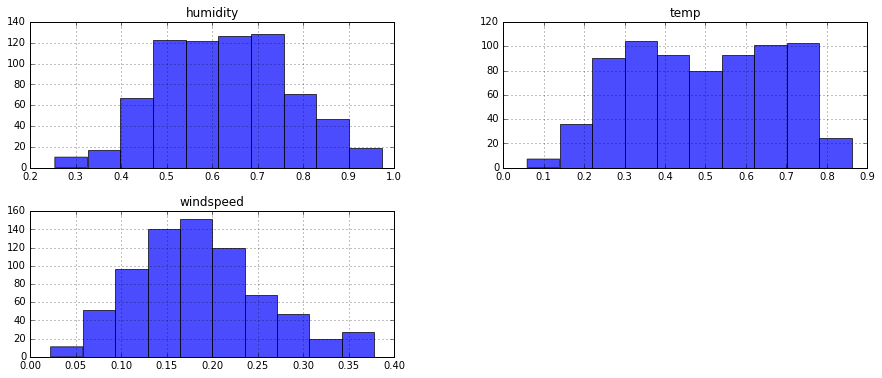

In [48]:
#Checking distribution of data pandas inbuilt histogram visualization
names = ['temp','humidity','windspeed']
data[names].hist(figsize=(15,6), alpha=0.7)
plt.show()

<b> Data is Uniformly distributed and already data is also scaled so we are not going to scale the data <b>

<b> Sampling Data  Splitting the Data to Train and Test sets <b>

In [49]:
X = data.drop(columns=['count'])
y = data['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

<b> Model Development <b>

In [50]:
# Defining function to fit the model and predict the results
from sklearn.metrics import explained_variance_score
def reg_models(regression_models, features, comparison):
    regression_models.fit(features, comparison)
    y_pred = regression_models.predict(X_test)
    KFCV = cross_val_score(estimator=regression_models, X=features, y=comparison, cv=10,
                           scoring = 'explained_variance' )
    KVC_Performance = KFCV.mean()
    print("K-Fold Cross Validation Explained Variance")
    print('<=========================================>')
    print(KVC_Performance)
    print()
    print("Explained Variance on Train Data")
    print('<================================>')
    print(regression_models.score(features, comparison))
    print()
    print("Explained Variance on Test Data")
    print('<==============================>')
    print(regression_models.score(X_test, y_test))

In [51]:
# Defining Function to Evaluate models on different error metrics
def eval_model(actual_vals, pdict_vals):
    print("Root Mean Squared Error --------->", round(np.sqrt(metrics.mean_squared_error(actual_vals,pdict_vals)), 2))
    print('<================================>')
    print(('Mean Absolute Percentage Error-->  {} % ').format(round(np.mean(np.abs((actual_vals - pdict_vals)/actual_vals))*100, 2)))
    print('<================================>')
    print("R2 Score ------------------------>", round(metrics.r2_score(actual_vals,pdict_vals), 2))

<b> Linear Regression Model <b>

In [52]:
# Linear Regression model variance explained
LR_Model = LinearRegression()
reg_models(LR_Model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.823164961689

Explained Variance on Train Data
<================================>
0.831827131222

Explained Variance on Test Data
<==============================>
0.772240721771


In [53]:
# Predict new test cases Linear Regression model
LR_Predict = LR_Model.predict(X_test) 

In [54]:
# Evaluation of linera Regression Model
eval_model(y_test, LR_Predict)

Root Mean Squared Error ---------> 881.23
<================================>
Mean Absolute Percentage Error-->  20.27 % 
<================================>
R2 Score ------------------------> 0.77


<b> K Nearest Neighbor Model <b>

In [55]:
# KNN model variance explained
KNN_Model = KNeighborsRegressor(n_neighbors=5)
reg_models(KNN_Model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.722216955855

Explained Variance on Train Data
<================================>
0.824756630648

Explained Variance on Test Data
<==============================>
0.724071257821


In [56]:
# Predict new test case for KNN model
KNN_Predict = KNN_Model.predict(X_test)

In [57]:
# Evaluation of KNN Model
eval_model(y_test, KNN_Predict)

Root Mean Squared Error ---------> 969.95
<================================>
Mean Absolute Percentage Error-->  26.67 % 
<================================>
R2 Score ------------------------> 0.72


<b> Support Vector Regressor Model <b>

In [58]:
# SVR model variance explained
SVR_Model = SVR()
reg_models(SVR_Model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.0199276683063

Explained Variance on Train Data
<================================>
0.0217576990689

Explained Variance on Test Data
<==============================>
0.019281737858


In [59]:
# Predict new test case for SVR model
SVR_Predict = SVR_Model.predict(X_test)

In [60]:
# Evaluation of SVR Model
eval_model(y_test, SVR_Predict)

Root Mean Squared Error ---------> 1828.62
<================================>
Mean Absolute Percentage Error-->  54.55 % 
<================================>
R2 Score ------------------------> 0.02


<b> Decision Tree Model <b>

In [61]:
# Decision Tree model variance explained
DT_Model = DecisionTreeRegressor(max_depth=2, random_state=100)
reg_models(DT_Model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.662445439664

Explained Variance on Train Data
<================================>
0.683729557525

Explained Variance on Test Data
<==============================>
0.678459809753


In [62]:
# Predict new test case for Decision Tree model
DT_Predict = DT_Model.predict(X_test)

In [63]:
# Evaluation of Decision Tree Model
eval_model(y_test, DT_Predict)

Root Mean Squared Error ---------> 1047.05
<================================>
Mean Absolute Percentage Error-->  27.11 % 
<================================>
R2 Score ------------------------> 0.68


<b> Random Forest Model <b>

In [64]:
# Random Forest Tree model variance explained
RF_Model = RandomForestRegressor(n_estimators=500, random_state=100)
reg_models(RF_Model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.868696945482

Explained Variance on Train Data
<================================>
0.98226807977

Explained Variance on Test Data
<==============================>
0.893250328622


In [65]:
# Predict new test case for Random Forest model
RF_Predict = RF_Model.predict(X_test)

In [66]:
# Evaluation of Random Forest Model
eval_model(y_test, RF_Predict)

Root Mean Squared Error ---------> 603.3
<================================>
Mean Absolute Percentage Error-->  13.55 % 
<================================>
R2 Score ------------------------> 0.89


<b> XGB Regressor Model <b>

In [67]:
# Xtreme Gradient Boosting Regressor model variance explained
XGB_Model = XGBRegressor()
reg_models(XGB_Model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.882039850436

Explained Variance on Train Data
<================================>
0.950247746798

Explained Variance on Test Data
<==============================>
0.873498282733


In [68]:
# Predict new test case for XGB model
XGB_Predict = XGB_Model.predict(X_test)

In [69]:
# Evaluation of XGB Model
eval_model(y_test, XGB_Predict)

Root Mean Squared Error ---------> 656.75
<================================>
Mean Absolute Percentage Error-->  13.97 % 
<================================>
R2 Score ------------------------> 0.87


<b> Hyper Parameter Tuning & Optimization <b>

<b>Lets Tune Both Random Forest Model and XGB Model and Then we will finalize the Outperformed Model from these both models<b>

In [70]:
# Hyper Paramter Tuning XGB MOdel to Find Optimum parameters
#xgb_model = XGBRegressor()

#params = [{'n_estimators':[250,350,450,550], 'max_depth':[2,3,5,7],
#           'learning_rate':[0.01, 0.045, 0.05, 0.055, 0.1], 'gamma':[0, 0.001, 0.01, 0.03, 0.05],
#           'subsample':[1, 0.5, 0.7, 0.8, 0.9]}]

#grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv = 5,
#                           scoring = 'explained_variance', n_jobs=-1)

#grid_search = grid_search.fit(X_train, y_train)
#print('Best Score ====>', grid_search.best_score_)
#print('Best Params ===>', grid_search.best_params_)

# Best Score ====> 0.897321837387
# Best Params ===> {'gamma': 0, 'learning_rate': 0.045, 'max_depth': 3, 'n_estimators': 550, 'subsample': 0.5}

<b> Tuned XGB Regressor Model <b>

In [71]:
# Tuned Xtreme Gradient Boosting Regressor model variance explained

xgb_model = XGBRegressor(learning_rate=0.045, max_depth=3, n_estimators=550, 
                         gamma = 0, subsample = 0.5)

reg_models(xgb_model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.894248319085

Explained Variance on Train Data
<================================>
0.980059869362

Explained Variance on Test Data
<==============================>
0.88862483886


In [72]:
# Predict new test case for Tuned XGB model
xgb_predict = xgb_model.predict(X_test)

In [73]:
# Evaluation of Tuned XGB Model
eval_model(y_test, xgb_predict)

Root Mean Squared Error ---------> 616.23
<================================>
Mean Absolute Percentage Error-->  12.9 % 
<================================>
R2 Score ------------------------> 0.89


<b> Tuned Random Forest Model <b>

In [74]:
# Hyper Paramter Tuning Random Forest Model to Find Optimum parameters
#rf_model = RandomForestRegressor(random_state=1)
#params = [{'n_estimators':[200,300,400,500,600,700,800,1000],'max_features':['auto','sqrt','log2'],
#           'min_samples_split':[2,4,6],'max_depth':[2,4,6,8,10,12,14,16],'min_samples_leaf':[2,3,5]}]

#grid_search = GridSearchCV(estimator = rf_model, param_grid = params, cv = 5,scoring = 'explained_variance', n_jobs=-1)

#grid_search = grid_search.fit(X_train, y_train)
#print('Best Score ====>', grid_search.best_score_)
#print('Best Params ===>', grid_search.best_params_)

# Best Score ====> 0.865267759445
# Best Params ===> {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800}

In [75]:
# Tuned Random Forest model variance explained
rf_model = RandomForestRegressor(n_estimators=800, max_depth=12, max_features='sqrt', min_samples_leaf=2, 
                                 min_samples_split=2)

reg_models(rf_model, X_train, y_train)

K-Fold Cross Validation Explained Variance
<=========================================>
0.869137751672

Explained Variance on Train Data
<================================>
0.952352342776

Explained Variance on Test Data
<==============================>
0.866081147839


In [76]:
# Predict new test case for Random Forest model
rf_predict = rf_model.predict(X_test)

In [77]:
# Evaluation of Random Forest Model
eval_model(y_test, rf_predict)

Root Mean Squared Error ---------> 675.73
<================================>
Mean Absolute Percentage Error-->  16.73 % 
<================================>
R2 Score ------------------------> 0.87


In [78]:
# Lets Plot Scatter Graph for predicted values for tuned XGBRegressor Model
XGB_Regressor = XGBRegressor(random_state=1, learning_rate=0.045, max_depth=3, n_estimators=550, 
                         gamma = 0, subsample=0.5)
XGB_Regressor.fit(X_train, y_train)
y_pred = XGB_Regressor.predict(X_test)

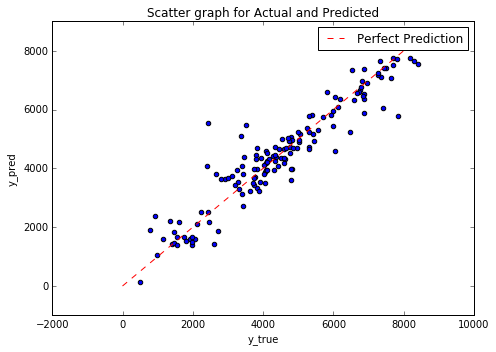

In [79]:
# Plotting Scatter plot for Tuned XGB Regressor for Actual and Predicted values
fig , ax = plt.subplots(figsize=(7,5))
ax.scatter(y_test, y_pred)
ax.plot([0,8000],[0,8000], 'r--', label = 'Perfect Prediction')
ax.legend()
plt.title("Scatter graph for Actual and Predicted")
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.tight_layout()
plt.show()

In [80]:
# Saving results back to hard disk
# Setting up the working directory
#os.chdir("E:\DataScienceEdwisor\PROJECT-2\Python")

#data.to_csv("final_day.csv", index = False)